In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Bharti_Airtel_Prices.xlsx',parse_dates=True,index_col='Date ')

In [ ]:
df.head()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,
2019-07-01,347.00,349.85,345.15,346.65,348.45,348.50,347.66,399.0,276.85,3405198,1.183867e+09,74444
2019-07-02,349.00,354.50,347.35,348.50,352.70,353.60,351.74,399.0,276.85,3745884,1.317578e+09,50799
2019-07-03,352.90,356.50,349.75,353.60,352.90,353.20,354.15,399.0,276.85,8317090,2.945468e+09,50960
2019-07-04,353.35,365.00,353.00,353.20,362.10,362.75,361.71,399.0,276.85,8407402,3.041005e+09,86438
2019-07-05,362.75,371.15,360.50,362.75,364.85,364.80,365.11,399.0,276.85,6751716,2.465131e+09,75154


In [ ]:
df.info

<bound method DataFrame.info of              OPEN    HIGH     LOW   PREV. CLOSE   ...  52W L   VOLUME         VALUE   No of trades 
Date                                              ...                                              
2019-07-01  347.00  349.85  345.15        346.65  ...  276.85  3405198  1.183867e+09          74444
2019-07-02  349.00  354.50  347.35        348.50  ...  276.85  3745884  1.317578e+09          50799
2019-07-03  352.90  356.50  349.75        353.60  ...  276.85  8317090  2.945468e+09          50960
2019-07-04  353.35  365.00  353.00        353.20  ...  276.85  8407402  3.041005e+09          86438
2019-07-05  362.75  371.15  360.50        362.75  ...  276.85  6751716  2.465131e+09          75154
...            ...     ...     ...           ...  ...     ...      ...           ...            ...
2021-06-23  538.00  539.20  532.70        536.40  ...  394.00  4679563  2.508527e+09          63718
2021-06-24  535.00  535.45  527.40        534.05  ...  394.00  6301610  3.341441e+09          75005
2021-06-25  531.30  535.90  529.35        528.75  ...  394.00  5402768  2.880566e+09          63409
2021-06-28  537.00  537.00  530.45        535.10  ...  394.00  5168753  2.751757e+09          79465
2021-06-29  531.25  532.25  524.00        531.20  ...  394.00  8553386  4.511159e+09         136722

[496 rows x 12 columns]>

<Axes: xlabel='Date '>

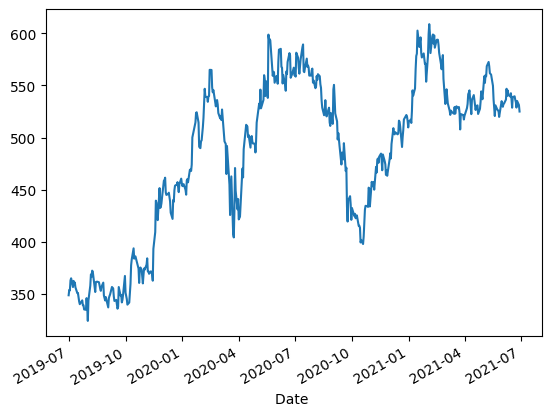

In [ ]:
df['close '].plot()

In [ ]:
len(df)

496

In [ ]:
airtel_close = df['close ']

In [ ]:
airtel_close.reset_index(drop=True,inplace=True)
airtel_close.shape

(496,)

In [ ]:
airtel_close = pd.DataFrame(airtel_close)

In [ ]:
train = airtel_close.iloc[:480]
test = airtel_close.iloc[480:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# CREATING THE MODEL :

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
test.shape

(16, 1)

In [ ]:
length = 16
batch_size = 32

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length = length, batch_size=batch_size)

#creates an object of train - length and last 16 values will be predicted and validated

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout

In [ ]:
n_features = 1

In [ ]:
model = Sequential()

model.add(SimpleRNN(30,input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))
#fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other
#during training which curbs the individual power of each neuron leading to over-fitting of training data.
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(generator,epochs=10,shuffle=False) #generally takes much longer time than ANN

Epoch 1/10
15/15 [==============================] - 2s 6ms/step - loss: 0.1104
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0627
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0436
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0319
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0254
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0235
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0183
Epoch 8/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0163
Epoch 9/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0157
Epoch 10/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0138


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 30)                960       
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991 (3.87 KB)
Trainable params: 991 (3.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

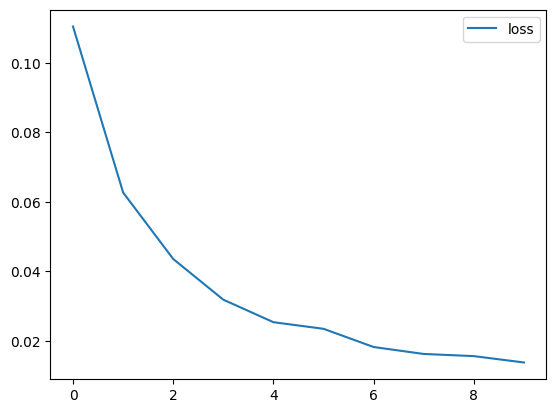

In [ ]:
losses.plot()

****

#EVALUATING TEST SET :

In [ ]:
first_eval_batch = scaled_train[-length:] #picks last 16 values in train set

In [ ]:
first_eval_batch

array([[0.79224425],
       [0.7455694 ],
       [0.71696789],
       [0.69047201],
       [0.72661871],
       [0.71205475],
       [0.70959818],
       [0.70836989],
       [0.68748903],
       [0.70082471],
       [0.74048079],
       [0.73346201],
       [0.72153009],
       [0.73047903],
       [0.73276013],
       [0.74592034]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,length,1))

In [ ]:
first_eval_batch

array([[[0.79224425],
        [0.7455694 ],
        [0.71696789],
        [0.69047201],
        [0.72661871],
        [0.71205475],
        [0.70959818],
        [0.70836989],
        [0.68748903],
        [0.70082471],
        [0.74048079],
        [0.73346201],
        [0.72153009],
        [0.73047903],
        [0.73276013],
        [0.74592034]]])

In [ ]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 155ms/step


array([[0.741815]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.7822425])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  #get prediction 1 time stamp ahead ([8] is for grabbing just the number instead of (array])
  current_pred = model.predict(current_batch)[0]

  #store prediction
  test_predictions.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [ ]:
test_predictions

[array([0.741815], dtype=float32),
 array([0.72390604], dtype=float32),
 array([0.72934175], dtype=float32),
 array([0.7187327], dtype=float32),
 array([0.7049266], dtype=float32),
 array([0.7019937], dtype=float32),
 array([0.69917595], dtype=float32),
 array([0.6881311], dtype=float32),
 array([0.66806304], dtype=float32),
 array([0.65625966], dtype=float32),
 array([0.6639409], dtype=float32),
 array([0.659155], dtype=float32),
 array([0.639065], dtype=float32),
 array([0.6345879], dtype=float32),
 array([0.6397574], dtype=float32),
 array([0.64006054], dtype=float32)]

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[535.28017598],
       [530.17702615],
       [531.72593035],
       [528.70288704],
       [524.76883752],
       [523.93310591],
       [523.13018805],
       [519.98295523],
       [514.26456454],
       [510.90118896],
       [513.08996131],
       [511.72622043],
       [506.00157951],
       [504.72581753],
       [506.19886965],
       [506.28525202]])

In [ ]:

test.loc[:,'predictions'] = true_predictions

In [ ]:
test

,close,predictions
480,546.80,535.280176
481,540.00,530.177026
482,545.15,531.725930
483,540.85,528.702887
484,539.35,524.768838
485,542.50,523.933106
486,536.75,523.130188
487,528.65,519.982955
488,538.75,514.264565
489,539.60,510.901189


<Axes: >

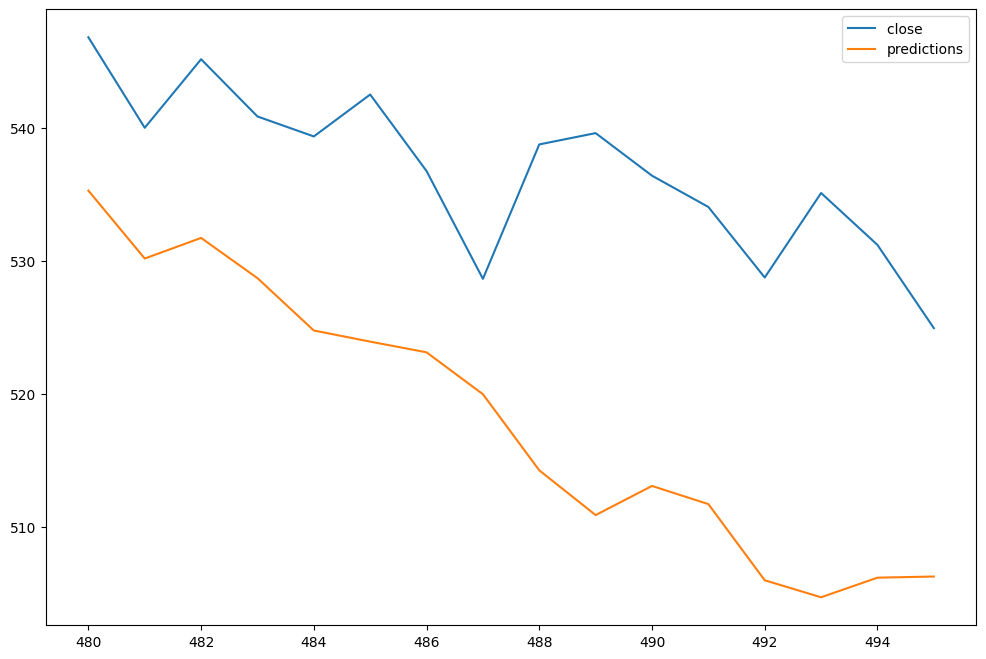

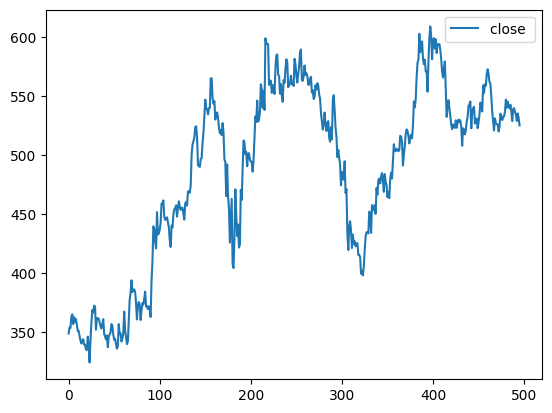

In [ ]:
test.plot(figsize=(12,8))
airtel_close.plot()

# Creating Full Model

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(airtel_close)

In [ ]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,
                                length = length, batch_size=32)

In [ ]:
model = Sequential()

model.add(SimpleRNN(30,input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 30)                960       
                                                                 
 dropout_6 (Dropout)         (None, 30)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991 (3.87 KB)
Trainable params: 991 (3.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0042


<ipython-input-208-b5005ef83afd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,shuffle=False)


Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 6/10
15/15 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 8/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 9/10
15/15 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 10/10
15/15 [==============================] - 0s 9ms/step - loss: 0.0039


<Axes: >

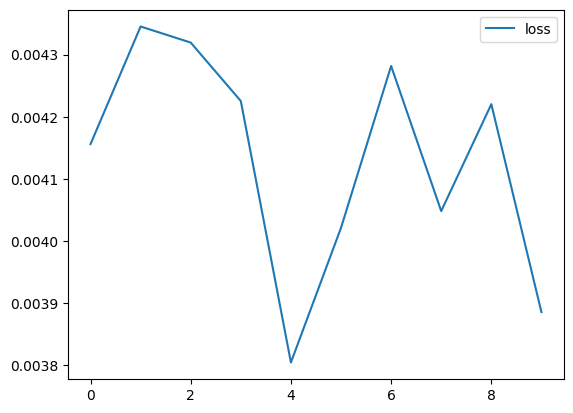

In [ ]:
full_model_losses = pd.DataFrame(model.history.history)
full_model_losses.plot()

In [ ]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(20):

  #get prediction 1 time stamp ahead ([8] is for grabbing just the number instead of (array])
  current_pred = model.predict(current_batch)[0]

  #store prediction
  forecast.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 36ms/step


In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast

array([[534.66851881],
       [533.50186426],
       [531.50537166],
       [530.71434284],
       [530.45779434],
       [529.47270241],
       [528.64018084],
       [527.33705709],
       [526.19226138],
       [525.68707907],
       [524.64288163],
       [523.92515724],
       [522.71133716],
       [521.88090467],
       [520.9963091 ],
       [520.22591626],
       [519.46070365],
       [518.60812357],
       [517.81257692],
       [517.04605651]])

In [ ]:
forecast.flatten()

array([534.66851881, 533.50186426, 531.50537166, 530.71434284,
       530.45779434, 529.47270241, 528.64018084, 527.33705709,
       526.19226138, 525.68707907, 524.64288163, 523.92515724,
       522.71133716, 521.88090467, 520.9963091 , 520.22591626,
       519.46070365, 518.60812357, 517.81257692, 517.04605651])

In [ ]:
df_array = np.array(airtel_close)
df_array

array([[348.5 ],
       [353.6 ],
       [353.2 ],
       [362.75],
       [364.8 ],
       [356.4 ],
       [362.3 ],
       [358.55],
       [360.75],
       [356.1 ],
       [350.6 ],
       [350.75],
       [346.25],
       [342.5 ],
       [339.95],
       [342.55],
       [343.6 ],
       [338.9 ],
       [339.  ],
       [334.9 ],
       [334.55],
       [345.75],
       [337.6 ],
       [323.9 ],
       [343.55],
       [357.7 ],
       [368.45],
       [366.1 ],
       [372.15],
       [371.15],
       [351.65],
       [361.2 ],
       [361.55],
       [361.  ],
       [358.05],
       [354.9 ],
       [352.75],
       [356.4 ],
       [360.65],
       [348.3 ],
       [345.8 ],
       [343.5 ],
       [346.8 ],
       [336.85],
       [345.7 ],
       [347.7 ],
       [349.25],
       [356.45],
       [355.1 ],
       [347.55],
       [343.05],
       [344.  ],
       [339.85],
       [335.6 ],
       [337.6 ],
       [356.4 ],
       [348.  ],
       [348.65],
       [341.65

In [ ]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

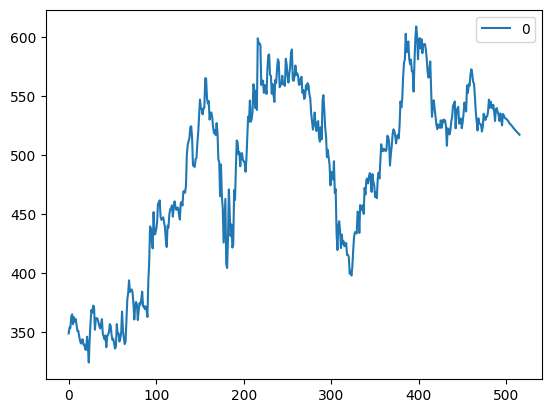

In [ ]:
full_data.plot()

# LSTM Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
length

16

In [ ]:
scaled_test.shape

(16, 1)

In [ ]:
length = 15
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length = length, batch_size=32)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                length = length, batch_size=32)


In [ ]:
model = Sequential()

model.add(LSTM(30,input_shape=(length,n_features)))

#model.add(LSTM(30)) - stacked LSTM

model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(generator,epochs=20,
          validation_data = validation_generator,
          callbacks=[early_stop],shuffle=False)


Epoch 1/20
15/15 [==============================] - 3s 46ms/step - loss: 0.3648 - val_loss: 0.2775
Epoch 2/20
15/15 [==============================] - 0s 12ms/step - loss: 0.1073 - val_loss: 0.0215
Epoch 3/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0207 - val_loss: 0.0108
Epoch 4/20
15/15 [==============================] - 0s 12ms/step - loss: 0.0221 - val_loss: 9.9545e-05
Epoch 5/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0171 - val_loss: 4.3656e-04
Epoch 6/20
15/15 [==============================] - 0s 12ms/step - loss: 0.0170 - val_loss: 0.0011


<Axes: >

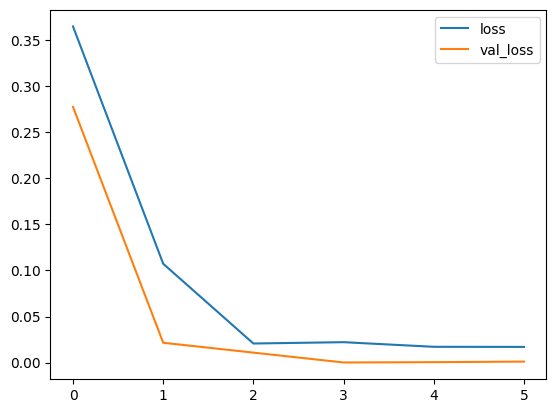

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  #get prediction 1 time stamp ahead ([8] is for grabbing just the number instead of (array])
  current_pred = model.predict(current_batch)[0]

  #store prediction
  test_predictions.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 23ms/step


<ipython-input-237-763b8d252c92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'LSTM_predictions'] = true_predictions


<Axes: >

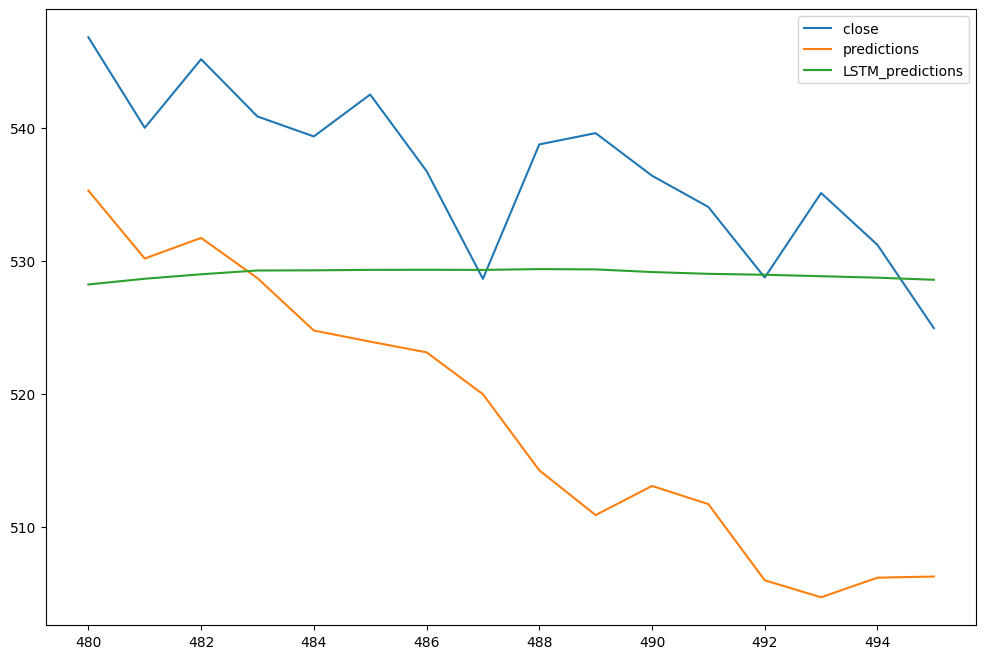

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test.loc[:,'LSTM_predictions'] = true_predictions
test.plot(figsize=(12,8))

In [ ]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(15):

  #get prediction 1 time stamp ahead ([8] is for grabbing just the number instead of (array])
  current_pred = model.predict(current_batch)[0]

  #store prediction
  forecast.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 35ms/step


In [ ]:
forecast=scaler.inverse_transform(forecast)

In [ ]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

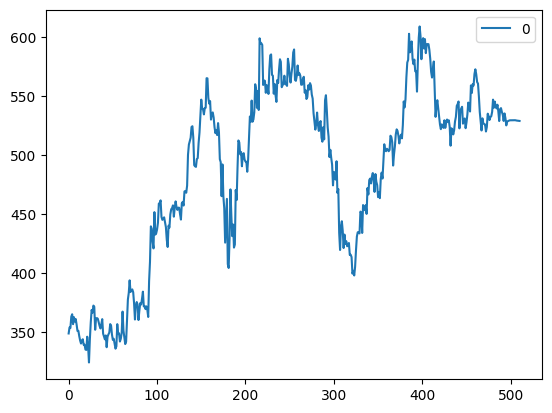

In [ ]:
full_data.plot();

In [ ]:
forecast

array([[528.22769908],
       [528.65716519],
       [528.99335328],
       [529.27843549],
       [529.29018866],
       [529.32412337],
       [529.33202109],
       [529.32106619],
       [529.3832119 ],
       [529.35985843],
       [529.16197385],
       [529.02688038],
       [528.95732949],
       [528.84861271],
       [528.73838432]])

In [ ]:
full_data.tail(30)

,0
481,540.000000
482,545.150000
483,540.850000
484,539.350000
485,542.500000
486,536.750000
487,528.650000
488,538.750000
489,539.600000
490,536.400000
